# Background

This is a slight modification of our earlier notebook.

We now wish to compute the parobability of observing a recombination conditioned on observing a single mutation event on either marginal tree (we also exclude recombinations and mutations affecting non-ancestal material).

$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} | \Omega' \right)$ may be expressed as
$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \right) / \mathbb{P}\left( \Omega' \right)$
whereby 

$\mathbb{P}\left( \Omega' \right) = p_{n}(1,1,1)$

and

$
\begin{aligned}
\mathbb{P}(\Omega^{\prime \, \text{vis}}) = p'_n &=  \sum_{k=2}^{n} \mathbb{P}(\Omega^{\prime \, \text{vis}}_k) \\
  &= \sum_{k=3}^{n} p^{\neg \rho, \neg \theta_1, \neg \theta_2}_{n,k} \frac{\rho}{k-1+ \theta_1 + \theta_2 +\rho} q'_{k+1,(0,0)} \\
\end{aligned}
$

holds. Both of these expressions are in terms of auxiliary expressdions defined below.

$$
p_n(m_l,m_r,r) =
\begin{cases}
\dfrac{ \begin{aligned} &(n-1) \, p_{n-1}(m_l,m_r,r)+ \theta_1 \, p_n(m_l-1,m_r,r) \\ &+ \theta_2 \, p_n(m_l,m_r -1,r) + \rho \, p_{n+1}(m_l,m_r,r-1) \end{aligned}}{n-1 + \theta_1 + \theta_2 + \rho}
&\text{ if }  n>1, m_l, m_r, r > 0 
\\
1
&\text{ if } n=1, m_l = m_r = r = 0
\\
0
&\text{ else}
\end{cases}
$$

$$
p^{\neg \rho, \neg \theta_1, \neg \theta_2}_{n,k} = \frac{p_n(0,0,0)}{p_{k}(0,0,0)} = \prod_{i = 1}^{n - k} \frac{n - i}{n-i + \theta_1 + \theta_2 + \rho}
$$

The auxiliary probabilities $(q'_{k,{i,j}})_{k \in \mathbb{N}, i,j \in \lbrace 0,1,2 \rbrace}$ satisfy the following recursive linear system (a slight modification on the earlier recursions to account for the fact that we prohibit any other mutations than those nessecary to reveal the incompatibility):

\begin{align}
q'_{k, (0,0)}
  &= \frac{(k-2) ( q'_{k-1,(1,0)} + q'_{k-1,(0,1)}) + \binom{k-2}{2} q'_{k-1,(0,0)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (0,1)}
  &= \frac{\frac{1}{2} \theta_2 \, q'_{k,(0,2)} + (k-2) \, q'_{k-1,(1,1)} + \binom{k-1}{2} \, q'_{k-1,(0,1)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (1,0)}
  &= \frac{\frac{1}{2} \theta_1 \, q'_{k,(2,0)} + (k-2) \, q'_{k-1,(1,1)} + \binom{k-1}{2} \, q'_{k-1,(1,0)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (0,2)} 
  &= \frac{(k-2) q'_{k-1,(1,2)} + \binom{k-1}{2} q'_{k-1,(0,2)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (2,0)}
  &= \frac{(k-2) q'_{k-1,(2,1)} + \binom{k-1}{2} q'_{k-1,(2,1)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (1,1)}
  &= \frac{\frac{1}{2} \theta_1 \, q'_{k,(2,1)} + \frac{1}{2} \theta_2 q'_{k,(1,2)} + \left( \binom{k}{2} - 1 \right) \, q'_{k-1,(1,1)} }{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (1,2)}
  &=\frac{\frac{1}{2} \theta_1 q'_{k,(2,2)} + \left( \binom{k}{2} - 1 \right) q'_{k-1,(1,2)}}{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\\
q'_{k, (2,1)}
  &= \frac{\frac{1}{2} \theta_2 q_{k,(2,2)} + \left( \binom{k}{2} - 1 \right) q_{k-1,(2,1)}}{\binom{k}{2} + \frac{k}{2} (\theta_1 + \theta_2 + \rho)}
\end{align}

with boundary conditions:
\begin{align}
q'_{k,(0,0)} &= 0 \text{ if } k<4 \\
q'_{k,(0,1)} &= 0 \text{ if } k<3 \\
q'_{k,(1,0)} &= 0 \text{ if } k<3 \\
q'_{k,(0,2)} &= 0 \text{ if } k<3 \\
q'_{k,(2,0)} &= 0 \text{ if } k<3 \\
q'_{k,(1,1)} &= 0 \text{ if } k<2 \\
q'_{k,(1,2)} &= 0 \text{ if } k<2 \\
q'_{k,(2,1)} &= 0 \text{ if } k<2 \\
q'_{k,(2,2)} &= p^{\neg \rho, \neg \theta_1, \neg \theta_2}_{k,1} = \prod_{i = 2}^k \frac{i-1}{i-1+ \theta_1 + \theta_2 +\rho}
\end{align}

The solution of this system will be a series of rational functions of integers $n \geq k > 1$ and non-negative reals $\rho, \theta_1, \theta_2$.

# Implementation

In [1]:
def pn(n, m1, m2, r, theta1, theta2, rho, known_values = None):
    'compute p_n(m1,m2,r) via memoization.'

    assert all([isinstance(x,int) for x in (n,m1,m2,r)])
    
    if known_values == None:
        known_values = dict()
    
    if (n,m1,m2,r) in known_values:
        return known_values[(n,m1,m2,r)],known_values
    
    elif (n == 1 and m1 == 0 and m2 == 0 and r == 0):
        return 1, known_values
    
    elif (n > 1 and m1 >= 0 and m2 >= 0 and r >= 0):
        a, known_values = pn(n - 1, m1, m2, r, theta1, theta2, rho, known_values)
        b, known_values = pn(n, m1 - 1, m2, r, theta1, theta2, rho, known_values)
        c, known_values = pn(n, m1, m2 - 1, r, theta1, theta2, rho, known_values)
        d, known_values = pn(n + 1, m1, m2, r - 1, theta1, theta2, rho, known_values)
    
        result = ( (n - 1) * a + theta1 * b + theta2 * c + rho * d ) / (n - 1 + theta1 + theta2 + rho)
        known_values[(n,m1,m2,r)] = result
        
        return result, known_values
    
    else:
        return 0, known_values

In [2]:
def p_neg(n1,n2,theta1,theta2,rho):
    '''The probability that a set of n1 lineages will coalesce to n2 lineages before experiencing
recurison or mutation'''
    assert n1 >= n2
    assert n2 > 0

    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(rho,float):
        assert rho >= 0
    
    return reduce( lambda x,y: x*y, [(k - 1)/(k - 1 + theta1 + theta2 + rho) for k in range(n1,n2,-1)], 1)

In [3]:
def choose2(k):
    return (k*(k-1))/2

In [4]:
def q_recursive(k,i,j,theta1,theta2,rho):
    'compute q_{k,(i,j)} using tail-recursion.'
    
    #convert integers to float (since a/b performs integer division if a and b are both integers)
    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(theta1,int):
        theta1 = float(theta1)
    if isinstance(theta2,int):
        theta2 = float(theta2)
    
    theta = theta1 + theta2
    
    if   (i,j) == (0,0):
        if k < 4:
            return 0
        else:
            a = q_recursive(k-1, 1, 0, theta1,theta2,rho)
            b = q_recursive(k-1, 0, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 0, 0, theta1,theta2,rho)
            result = ( (k - 2)*(a+b) + choose2(k-2)*c ) / (choose2(k) + k/2 * (rho + theta) )
            return result
            
    elif (i,j) == (0,1):
        if k < 3:
            return 0
        else:
            a = q_recursive(k  , 0, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 0, 1, theta1,theta2,rho)
            result = ( a*theta2/2 + (k - 2)*b + choose2(k-1)*c ) / (choose2(k) + k/2 * (rho + theta) )
            return result

    elif (i,j) == (1,0):
        if k < 3:
            return 0
        else:
            a = q_recursive(k  , 2, 0, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            c = q_recursive(k-1, 1, 0, theta1,theta2,rho)
            result = ( a*theta1/2 + (k - 2)*b + choose2(k-1)*c ) / (choose2(k) + k/2 * (rho + theta) )
            return result

    elif (i,j) == (0,2):
        if k < 3:
            return 0
        else:
            a = q_recursive(k-1, 1, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 0, 2, theta1,theta2,rho)
            result = ( (k - 2)*a + choose2(k-1)*b ) / (choose2(k) + k/2 * (rho + theta) )
            return result
    
    elif (i,j) == (2,0):
        if k < 3:
            return 0
        else:
            a = q_recursive(k-1, 2, 1, theta1,theta2,rho)
            b = q_recursive(k-1, 2, 0, theta1,theta2,rho)
            result = ( (k - 2)*a + choose2(k-1)*b ) / (choose2(k) + k/2 * (rho + theta) )
            return result
    
    elif (i,j) == (1,1):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 1, theta1,theta2,rho)
            b = q_recursive(k  , 1, 2, theta1,theta2,rho)
            c = q_recursive(k-1, 1, 1, theta1,theta2,rho)
            result = ( (theta1*a + theta2*b)/2 + (choose2(k) - 1)*c ) / (choose2(k) + k/2 * (rho + theta) )
            return result
    
    elif (i,j) == (1,2):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 1, 2, theta1,theta2,rho)
            result = ( a*theta1/2 + (choose2(k) - 1)*b ) / (choose2(k) + k/2 * (rho + theta) )
            return result
    
    elif (i,j) == (2,1):
        if k < 2:
            return 0
        else:
            a = q_recursive(k  , 2, 2, theta1,theta2,rho)
            b = q_recursive(k-1, 2, 1, theta1,theta2,rho)
            result = ( a*theta2/2 + (choose2(k) - 1)*b ) / (choose2(k) + k/2 * (rho + theta) )
            return result
    
    elif (i,j) == (2,2):
        result = p_neg(k,1,theta1,theta2,rho)
        return result
    
    else:
        raise ValueError('0 <= i,j <= 2 must hold; arguments here: i = %i, j=%i'%(i,j))

In [5]:
def q_recursive_memorized(k,i,j,theta1,theta2,rho, known_values = None ):
    '''compute q_{k,(i,j)} using tail-recursion and tableing of known values.
    
Returns q_{k,(i,j)} as well as a dictionary of other q-values computed in the
process of determining q_{k,(i,j)}.'''
    
    if known_values == None:
        known_values = dict()
    
    #check to see if we already know q_{k,(i,j)}
    if (k,i,j) in known_values:
        return known_values[(k,i,j)],known_values
    
    #convert integers to float (since a/b performs integer division if a and b are both integers)
    if isinstance(rho,int):
        rho = float(rho)
    if isinstance(theta1,int):
        theta1 = float(theta1)
    if isinstance(theta2,int):
        theta2 = float(theta2)   
    
    theta = theta1 + theta2
        
        
    if   (i,j) == (0,0):
        if k < 4:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 1, 0, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 0, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 0, 0, theta1,theta2,rho, known_values)
            result = ( (k - 2)*(a+b) + choose2(k-2)*c ) / (choose2(k) + k/2 * (rho + theta) )
            
    elif (i,j) == (0,1):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 0, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 0, 1, theta1,theta2,rho, known_values)
            result = ( a*theta2/2 + (k - 2)*b + choose2(k-1)*c ) / (choose2(k) + k/2 * (rho + theta) )

    elif (i,j) == (1,0):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 0, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 1, 0, theta1,theta2,rho, known_values)
            result = ( a*theta1/2 + (k - 2)*b + choose2(k-1)*c ) / (choose2(k) + k/2 * (rho + theta) )

    elif (i,j) == (0,2):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 1, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 0, 2, theta1,theta2,rho, known_values)
            result = ( (k - 2)*a + choose2(k-1)*b ) / (choose2(k) + k/2 * (rho + theta) )
    
    elif (i,j) == (2,0):
        if k < 3:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k-1, 2, 1, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 2, 0, theta1,theta2,rho, known_values)
            result = ( (k - 2)*a + choose2(k-1)*b ) / (choose2(k) + k/2 * (rho + theta) )
    
    elif (i,j) == (1,1):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 1, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k  , 1, 2, theta1,theta2,rho, known_values)
            c,known_values = q_recursive_memorized(k-1, 1, 1, theta1,theta2,rho, known_values)
            result = ( (theta1*a + theta2*b)/2 + (choose2(k) - 1)*c ) / (choose2(k) + k/2 * (rho + theta) )
    
    elif (i,j) == (1,2):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 1, 2, theta1,theta2,rho, known_values)
            result = ( a*theta1/2 + (choose2(k) - 1)*b ) / (choose2(k) + k/2 * (rho + theta) )
    
    elif (i,j) == (2,1):
        if k < 2:
            result = 0
        else:
            a,known_values = q_recursive_memorized(k  , 2, 2, theta1,theta2,rho, known_values)
            b,known_values = q_recursive_memorized(k-1, 2, 1, theta1,theta2,rho, known_values)
            result = ( a*theta2/2 + (choose2(k) - 1)*b ) / (choose2(k) + k/2 * (rho + theta) )
    
    elif (i,j) == (2,2):
        result = p_neg(k,1,theta1,theta2,rho)
    
    else:
        raise ValueError('0 <= i,j <= 2 must hold; arguments here: i = %i, j=%i'%(i,j))
    
    known_values[(k,i,j)] = result
    return result, known_values

In [6]:
q_recursive_memorized(50,0,0,1.0,1.0,0.0)[0] - q_recursive(50,0,0,1.0,1.0,0.0)

0.0

In [7]:
q_recursive_memorized(6,0,0,1.0,1.0,0.0)[1]

{(1, 1, 1): 0,
 (1, 1, 2): 0,
 (1, 2, 1): 0,
 (2, 0, 1): 0,
 (2, 0, 2): 0,
 (2, 1, 0): 0,
 (2, 1, 1): 0.018518518518518517,
 (2, 1, 2): 0.05555555555555555,
 (2, 2, 0): 0,
 (2, 2, 1): 0.05555555555555555,
 (2, 2, 2): 0.3333333333333333,
 (3, 0, 0): 0,
 (3, 0, 1): 0.004814814814814815,
 (3, 0, 2): 0.01111111111111111,
 (3, 1, 0): 0.004814814814814815,
 (3, 1, 1): 0.015185185185185185,
 (3, 1, 2): 0.03888888888888888,
 (3, 2, 0): 0.01111111111111111,
 (3, 2, 1): 0.03888888888888888,
 (3, 2, 2): 0.16666666666666666,
 (4, 0, 0): 0.001925925925925926,
 (4, 0, 1): 0.005037037037037037,
 (4, 0, 2): 0.01111111111111111,
 (4, 1, 0): 0.005037037037037037,
 (4, 1, 1): 0.010037037037037035,
 (4, 1, 2): 0.024444444444444442,
 (4, 2, 0): 0.01111111111111111,
 (4, 2, 1): 0.024444444444444442,
 (4, 2, 2): 0.09999999999999999,
 (5, 0, 0): 0.0025714285714285713,
 (5, 0, 1): 0.004666666666666666,
 (5, 0, 2): 0.009999999999999998,
 (5, 1, 0): 0.004666666666666666,
 (5, 2, 0): 0.009999999999999998,
 (6, 0,

# Symbolic computation

The above implmentation also supports symbolic computation. We may use this to get exact formulas expressing $q_{k,(0,0)}$ as a rational function in the indeterminates $\theta_1, \theta_2$, and $\rho$ (the below does just this using sympy):

In [8]:
import sympy
sympy.init_printing(use_latex=True)

In [9]:
k = 4
t, t1,t2,r = sympy.symbols(r'\theta \theta_1 \theta_2 \rho')
f = q_recursive(k,0,0,t1,t2,r) # general formula
g = f.subs(r,0) # f with \rho = 0
h = q_recursive(k,0,0,t/2,t/2,r) # f with theta1 = theta2 = theta/2

In [10]:
sympy.pprint(f)
print g,'\n'
print h,'\n'

  ⎛                        \theta₁⋅\theta₂                                    
4⋅⎜──────────────────────────────────────────────────────────────── + ────────
  ⎜                                2                                          
  ⎝4⋅(\rho + \theta₁ + \theta₂ + 1) ⋅(\rho + \theta₁ + \theta₂ + 3)   2⋅(\rho 
──────────────────────────────────────────────────────────────────────────────
                  (\rho + \theta₁ + \theta₂ + 3)⋅(2⋅\rho + 2⋅\theta₁ + 2⋅\thet

 \theta₁⋅\theta₂         ⎞
─────────────────────────⎟
                        3⎟
+ \theta₁ + \theta₂ + 1) ⎠
──────────────────────────
a₂ + 6)                   
4*(\theta_1*\theta_2/(4*(\theta_1 + \theta_2 + 1)**2*(\theta_1 + \theta_2 + 3)) + \theta_1*\theta_2/(2*(\theta_1 + \theta_2 + 1)**3))/((\theta_1 + \theta_2 + 3)*(2*\theta_1 + 2*\theta_2 + 6)) 

4*(\theta**2/(16*(\rho + \theta + 1)**2*(\rho + \theta + 3)) + \theta**2/(8*(\rho + \theta + 1)**3))/((\rho + \theta + 3)*(2*\rho + 2*\theta + 6)) 



### We may also print these expressions in latex:

In [11]:
print sympy.latex(f),'\n'
print sympy.latex(f.simplify()),'\n\n'
print sympy.latex(g),'\n'
print sympy.latex(g.simplify()),'\n\n'
print sympy.latex(h),'\n'
print sympy.latex(h.simplify()),'\n\n'
#print sympy.latex(g)

\frac{\frac{\theta_1 \theta_2}{\left(\rho + \theta_1 + \theta_2 + 1\right)^{2} \left(\rho + \theta_1 + \theta_2 + 3\right)} + \frac{2 \theta_1 \theta_2}{\left(\rho + \theta_1 + \theta_2 + 1\right)^{3}}}{\left(\rho + \theta_1 + \theta_2 + 3\right) \left(2 \rho + 2 \theta_1 + 2 \theta_2 + 6\right)} 

\frac{\theta_1 \theta_2 \left(3 \rho + 3 \theta_1 + 3 \theta_2 + 7\right)}{2 \left(\rho + \theta_1 + \theta_2 + 1\right)^{3} \left(\rho + \theta_1 + \theta_2 + 3\right)^{3}} 


\frac{\frac{\theta_1 \theta_2}{\left(\theta_1 + \theta_2 + 1\right)^{2} \left(\theta_1 + \theta_2 + 3\right)} + \frac{2 \theta_1 \theta_2}{\left(\theta_1 + \theta_2 + 1\right)^{3}}}{\left(\theta_1 + \theta_2 + 3\right) \left(2 \theta_1 + 2 \theta_2 + 6\right)} 

\frac{\theta_1 \theta_2 \left(3 \theta_1 + 3 \theta_2 + 7\right)}{2 \left(\theta_1 + \theta_2 + 1\right)^{3} \left(\theta_1 + \theta_2 + 3\right)^{3}} 


\frac{\frac{\theta^{2}}{4 \left(\rho + \theta + 1\right)^{2} \left(\rho + \theta + 3\right)} + \frac{\thet

this latex-source code can then be typeset:

### *f* :
$$\frac{1}{2 \rho + 6} \left(\frac{1}{\frac{3 \rho}{2} + \frac{\theta_2}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_1}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right) + \frac{1}{\frac{3 \rho}{2} + \frac{\theta_1}{2} + 3} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{1}{\rho + \frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_2}{2} + 1\right)} + \frac{\theta_1 \theta_2}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta_1}{2} + 1\right)}\right)\right)\right)$$

### *f* (simplified) :
$$\frac{2 \theta_1 \theta_2 \left(\left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)\right) \left(3 \rho + \theta_2 + 6\right) + \left(3 \left(\rho + 2\right) \left(4 \rho + \theta_1 + \theta_2 + 4\right) + \left(2 \rho + \theta_2 + 2\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)\right) \left(3 \rho + \theta_1 + 6\right)\right)}{3 \left(\rho + 1\right) \left(\rho + 2\right) \left(\rho + 3\right) \left(2 \rho + \theta_1 + 2\right) \left(2 \rho + \theta_2 + 2\right) \left(3 \rho + \theta_1 + 6\right) \left(3 \rho + \theta_2 + 6\right) \left(2 \rho + \theta_1 + \theta_2 + 2\right)} $$

### *g* :
$$
\frac{1}{\frac{3 \theta_2}{2} + 9} \left(\frac{\theta_1 \theta_2}{6 \theta_1 + 12} + \frac{1}{\frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \theta_2 + 4} + \frac{\theta_1 \theta_2}{2 \theta_1 + 4}\right)\right) + \frac{1}{\frac{3 \theta_1}{2} + 9} \left(\frac{\theta_1 \theta_2}{6 \theta_2 + 12} + \frac{1}{\frac{\theta_1}{2} + \frac{\theta_2}{2} + 1} \left(\frac{\theta_1 \theta_2}{2 \theta_2 + 4} + \frac{\theta_1 \theta_2}{2 \theta_1 + 4}\right)\right)$$

### *g*  (simplified) :
$$
\frac{\theta_1 \theta_2}{9 \left(\theta_1 + 2\right) \left(\theta_1 + 6\right) \left(\theta_2 + 2\right) \left(\theta_2 + 6\right) \left(\theta_1 + \theta_2 + 2\right)} \left(\left(\theta_1 + 6\right) \left(6 \theta_1 + 6 \theta_2 + \left(\theta_2 + 2\right) \left(\theta_1 + \theta_2 + 2\right) + 24\right) + \left(\theta_2 + 6\right) \left(6 \theta_1 + 6 \theta_2 + \left(\theta_1 + 2\right) \left(\theta_1 + \theta_2 + 2\right) + 24\right)\right) $$

### *h* :
$$\frac{1}{\left(2 \rho + 6\right) \left(\frac{3 \rho}{2} + \frac{\theta}{4} + 3\right)} \left(\frac{\theta^{2}}{2 \left(\rho + 1\right) \left(\rho + \frac{\theta}{4} + 1\right) \left(\rho + \frac{\theta}{2} + 1\right)} + \frac{\theta^{2}}{4 \left(\rho + 1\right) \left(\frac{3 \rho}{2} + 3\right) \left(\rho + \frac{\theta}{4} + 1\right)}\right)$$
 ### *h* (simplified) :
 $$
\frac{4 \theta^{2} \left(8 \rho + \theta + 14\right)}{3 \left(\rho + 1\right) \left(\rho + 2\right) \left(\rho + 3\right) \left(2 \rho + \theta + 2\right) \left(4 \rho + \theta + 4\right) \left(6 \rho + \theta + 12\right)} 
$$

## Towards conditionals

We now write functions for computing the following qunatities

$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} | \Omega' \right)$ may be expressed as
$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \right) / \mathbb{P}\left( \Omega' \right)$
whereby 

$\mathbb{P}\left( \Omega' \right) = p_{n}(1,1,1)$

and

$
\begin{aligned}
\mathbb{P}(\Omega^{\prime \, \text{vis}}) = p'_n &=  \sum_{k=2}^{n} \mathbb{P}(\Omega^{\prime \, \text{vis}}_k) \\
  &= \sum_{k=3}^{n} p^{\neg \rho, \neg \theta_1, \neg \theta_2}_{n,k} \frac{\rho}{k-1+ \theta_1 + \theta_2 +\rho} q'_{k+1,(0,0)} \\
\end{aligned}
$

In [12]:
def precompute_q(k_max,theta1,theta2,rho):
    known_values = dict()

    #to avoid stack-overflows in recursion, we compute all q-values in chunks,
    #i.e. we
    #  * first compute q(k,i,j) for k <= 30
    #  * then compute q(k,i,j) for k <= 60 (already knowing the values from the previous step)
    #  * ...
    # untill we have eveything we want.
    k_range = range(3,k_max+3,30)
    if k_range[-1] < k_max+2:
        k_range.append(k_max+2)

    for k in k_range:
        known_values = q_recursive_memorized(k,0,0,theta1,theta2,rho,known_values)[1]

    return known_values
#     #return q_recursive_memorized(k_max+2,0,0,theta1,theta2,rho)[1]

In [13]:
def P_omega_prime(n,theta1,theta2,rho, known_pn_values = None):
    prob, aux_prob_table = pn(n, 1, 1, 1, theta1, theta2, rho, known_pn_values)
    return prob

def P_omega_prime_vis(n, theta1, theta2, rho, PRECOMPUTE = True):
    k_range = range(3,n+1) if n>1 else []
    q_precomputed = precompute_q(n+1,theta1,theta2,rho) if PRECOMPUTE else None
    return sum([P_omega_prime_vis_k(k,n,theta1,theta2,rho,q_precomputed) for k in k_range])

def P_omega_prime_vis_k(k,n,theta1,theta2,rho,q_precomputed = None):
    a = p_neg(n, k, theta1, theta2, rho)
    b = rho / (k - 1 + theta1 + theta2 + rho)
    c = q_recursive_memorized(k + 1, 0, 0, theta1, theta2, rho, q_precomputed)[0]
    return a*b*c

def P_omega_prime_vis_conditioned(n,theta1,theta2,rho):
    if n<3:
        return 0
    else:
        numerator = P_omega_prime_vis(n,theta1,theta2,rho, True)
        denominator = P_omega_prime(n, theta1, theta2, rho)
        return numerator / denominator


In [14]:
# def P_omega_k(k,n,rho):
#     return p_neg(n,1,rho) * ( (rho*k) / ( (k-1+rho) * (k+rho) ) )

# def P_omega_toN(n,rho):
#     return p_neg(n,1,rho) * sum([(rho*k) / ( (k-1+rho) * (k+rho) ) for k in xrange(2,n)])

# def P_omegea_vis_k(k,n,theta1,theta2,rho, q_precomputed = None):
#     if q_precomputed != None:
#         if (k+1,0,0) not in q_precomputed:
#             print (k+1,0,0), q_precomputed[(k+1,0,0)]
#         q = q_precomputed[(k+1,0,0)]
#         return p_neg(n,k,rho) * ( rho / (k-1+rho) ) * q
#     else:
#         return p_neg(n,k,rho) * ( rho / (k-1+rho) ) * q_recursive(k+1,0,0,theta1,theta2,rho)

# def P_omega_vis(n,theta1,theta2,rho, precompute = True):
#     k_range = range(3,n+1) if n>1 else []
#     q_precomputed = precompute_q(n+1,theta1,theta2,rho) if precompute else None
#     return sum([P_omegea_vis_k(k,n,theta1,theta2,rho,q_precomputed) for k in k_range])

# def P_omega_vis_conditioned(n,theta1,theta2,rho):
#     if n<3:
#         return 0
#     else:
#         numerator = P_omega_prime_vis(n,theta1,theta2,rho)
#         denominator = P_omega_prime(n,rho)
#         return numerator / denominator
    
# def P_2_mutations_1_recomb(n,theta,rho):
#     p_neg(n,1,rho+theta) * sum([(rho*k) / ( (k-1+rho) * (k+rho) ) for k in xrange(2,n+1)]) * sum([ theta**2 / ( (k-1+theta)*(l-1+theta) ) for k in range(2,n+1) for l in range(2,k+1)])

In [15]:
#verify that precomputing does not affect outcome
P_omega_prime_vis(4,0.5,0.5,1.0,True) - P_omega_prime_vis(4,0.5,0.5,1.0,False)

In [16]:
#D = precompute_q(100,0.5,0.5,1.0)

#### A numerical example

In [17]:
n = 3
k = 3
theta1, theta2 = 0.5,0.5
rho = 1.0

#print P_omega_k(k,n,rho),'\n'
print P_omega_prime(n,theta1,theta2,rho),'\n'
print P_omega_prime_vis_k(k,n,theta1,theta2,rho),'\n'
print P_omega_prime_vis(n,theta1,theta2,rho,PRECOMPUTE=False),'\n'
print P_omega_prime_vis_conditioned(n,theta1,theta2,rho),'\n'

0.0202627314815 

0.00012037037037 

0.00012037037037 

0.00594048095048 



#### A symbolic example

In [18]:
n = 3
k = 3
theta, theta1, theta2, t1,t2 = sympy.symbols(r'\theta \theta_1 \theta_2 t1 t2')
r, rho = sympy.symbols(r'r \rho')

# sympy.pprint(P_omega_k(k,n,r))
# print '\n'
sympy.pprint(P_omega_prime(n,t1,t2,r))
print '\n'
sympy.pprint(sympy.simplify(P_omega_prime_vis_k(k,n,t1,t2,r)))
print '\n'
sympy.pprint(sympy.simplify(P_omega_prime_vis(n,t1,t2,r)))
print '\n'
sympy.pprint(sympy.simplify(P_omega_prime_vis_conditioned(n,t1,t2,r)))

  ⎛                                                                           
  ⎜   ⎛                                                          ⎛            
  ⎜   ⎜                                                        3⋅⎜────────────
  ⎜   ⎜                                                          ⎜(r + t₁ + t₂
  ⎜   ⎜                         6⋅t₂                             ⎝            
  ⎜t₁⋅⎜───────────────────────────────────────────────────── + ───────────────
  ⎜   ⎝(r + t₁ + t₂ + 1)⋅(r + t₁ + t₂ + 2)⋅(r + t₁ + t₂ + 3)                  
r⋅⎜───────────────────────────────────────────────────────────────────────────
  ⎝                                                     r + t₁ + t₂ + 3       
──────────────────────────────────────────────────────────────────────────────
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                    

In [19]:
p_3 = P_omega_prime_vis(3,theta1,theta2,rho)
p_3_star = P_omega_prime_vis_conditioned(3,theta1,theta2,rho)
p_3_symm = P_omega_prime_vis(3,theta/2,theta/2,rho)
p_3_star_symm = P_omega_prime_vis_conditioned(3,theta/2,theta/2,rho)

In [20]:
# print sympy.pprint(p_3),'\n\n'
# print sympy.latex(p_3),'\n\n'

# print sympy.pprint(p_3.simplify()),'\n\n'
# print sympy.latex(p_3.simplify()),'\n\n'

# print sympy.pprint(p_3_symm),'\n\n'
# print sympy.latex(p_3_symm),'\n\n'

print sympy.pprint(p_3_symm.simplify()),'\n\n'
print sympy.latex(p_3_symm.simplify()),'\n\n'

# print sympy.pprint(p_3_star.simplify()),'\n\n'
# print sympy.latex(p_3_star.simplify()),'\n\n'

print sympy.pprint(p_3_star_symm.simplify()),'\n\n'
print sympy.latex(p_3_star_symm.simplify())

                         2                                     
              \rho⋅\theta ⋅(3⋅\rho + 3⋅\theta + 7)             
───────────────────────────────────────────────────────────────
                     3                                        3
8⋅(\rho + \theta + 1) ⋅(\rho + \theta + 2)⋅(\rho + \theta + 3) 
None 


\frac{\rho \theta^{2} \left(3 \rho + 3 \theta + 7\right)}{8 \left(\rho + \theta + 1\right)^{3} \left(\rho + \theta + 2\right) \left(\rho + \theta + 3\right)^{3}} 


                                                                              
                                                                              
──────────────────────────────────────────────────────────────────────────────
  ⎛  ⎛                                                                        
8⋅⎝3⋅⎝((\rho + \theta + 1)⋅(\rho + \theta + 2) + (\rho + \theta + 3)⋅(2⋅\rho +

                                                                              
                                

### We compute values for a table of examples
Like table 1 in my note.

In [21]:
examples = [(n,r,t1,t2) for n in (3,10,20,30,40,50) for (r,t1,t2) in [(1.0,0.5,0.5),(1.0,0.01,0.99),(1e-6,1e6,1e6)]]
results = []
for ex in examples:
    n,r,t1,t2 = ex
    print 'n = %i, r = %.3g,t1 = %.3g,t2 = %.3g'%ex

    ex_res = []
    
    ex_res.append(P_omega_prime(n,t1,t2,r))
    print 'P(Omega 2 to %i) :\t%.5g'%(n,ex_res[-1])
    
    ex_res.append(P_omega_prime_vis(n,t1,t2,r))
    print 'P(Omega_vis) :\t%.5g'%(ex_res[-1])
    
    ex_res.append(ex_res[1]/ex_res[0])
    print 'P( Omega_vis | Omega 2 to %i) :\t%.5g'%(n,ex_res[-1])
    
    print ''
    
    results.append(ex_res)

n = 3, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 3) :	0.020263
P(Omega_vis) :	0.00012037
P( Omega_vis | Omega 2 to 3) :	0.0059405

n = 3, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 3) :	0.0008024
P(Omega_vis) :	4.7667e-06
P( Omega_vis | Omega 2 to 3) :	0.0059405

n = 3, r = 1e-06,t1 = 1e+06,t2 = 1e+06
P(Omega 2 to 3) :	3.125e-30
P(Omega_vis) :	2.3437e-32
P( Omega_vis | Omega 2 to 3) :	0.0075

n = 10, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 10) :	0.017919
P(Omega_vis) :	0.00023439
P( Omega_vis | Omega 2 to 10) :	0.013081

n = 10, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 10) :	0.00070959
P(Omega_vis) :	9.282e-06
P( Omega_vis | Omega 2 to 10) :	0.013081

n = 10, r = 1e-06,t1 = 1e+06,t2 = 1e+06
P(Omega 2 to 10) :	3.1574e-67
P(Omega_vis) :	5.1324e-69
P( Omega_vis | Omega 2 to 10) :	0.016255

n = 20, r = 1,t1 = 0.5,t2 = 0.5
P(Omega 2 to 20) :	0.011652
P(Omega_vis) :	0.00014047
P( Omega_vis | Omega 2 to 20) :	0.012055

n = 20, r = 1,t1 = 0.01,t2 = 0.99
P(Omega 2 to 20) :	0.00046143
P(Omega_vis) :	5.5626e-0

*format output as a latex-table:*

In [48]:
print ' & '.join(map(lambda x: '%s'%x, [r'$n$', r'$\rho$', r'$\theta_1$', r'$\theta_2$', r"$\mathbb{P}\left( \Omega' \right)$", r"$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \right)$", r"$\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \vert \Omega' \right)$"]))+r' \\'
for line in zip(examples,results):
    line = line[0] + tuple(line[1])
    print ' & '.join(map(lambda x: '%.3G'%x, line))+r' \\'

$n$ & $\rho$ & $\theta_1$ & $\theta_2$ & $\mathbb{P}\left( \Omega' \right)$ & $\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \right)$ & $\mathbb{P}\left( \Omega^{\prime \, \text{vis}} \vert \Omega' \right)$ \\
3 & 1 & 0.5 & 0.5 & 0.0203 & 0.00012 & 0.00594 \\
3 & 1 & 0.01 & 0.99 & 0.000802 & 4.77E-06 & 0.00594 \\
3 & 1E-06 & 1E+06 & 1E+06 & 3.12E-30 & 2.34E-32 & 0.0075 \\
10 & 1 & 0.5 & 0.5 & 0.0179 & 0.000234 & 0.0131 \\
10 & 1 & 0.01 & 0.99 & 0.00071 & 9.28E-06 & 0.0131 \\
10 & 1E-06 & 1E+06 & 1E+06 & 3.16E-67 & 5.13E-69 & 0.0163 \\
20 & 1 & 0.5 & 0.5 & 0.0117 & 0.00014 & 0.0121 \\
20 & 1 & 0.01 & 0.99 & 0.000461 & 5.56E-06 & 0.0121 \\
20 & 1E-06 & 1E+06 & 1E+06 & 1.4E-117 & 1.65E-119 & 0.0118 \\
30 & 1 & 0.5 & 0.5 & 0.00831 & 9.08E-05 & 0.0109 \\
30 & 1 & 0.01 & 0.99 & 0.000329 & 3.6E-06 & 0.0109 \\
30 & 1E-06 & 1E+06 & 1E+06 & 4.74E-166 & 4.21E-168 & 0.00888 \\
40 & 1 & 0.5 & 0.5 & 0.00633 & 6.39E-05 & 0.0101 \\
40 & 1 & 0.01 & 0.99 & 0.000251 & 2.53E-06 & 0.0101 \\
40 & 1E-06 & 1

In [22]:
l = []

In [23]:
l.append(5)

In [24]:
l

In [25]:
r = sympy.symbols('r')

In [26]:
q = precompute_q(20,theta1,theta2,rho)

In [27]:
print sympy.latex(sympy.simplify(q[(6,0,0)]))

\frac{\theta_1 \theta_2}{8 \left(\rho + \theta_1 + \theta_2 + 1\right)^{3} \left(\rho + \theta_1 + \theta_2 + 2\right) \left(\rho + \theta_1 + \theta_2 + 3\right)^{3} \left(\rho + \theta_1 + \theta_2 + 5\right)^{3}} \left(8 \left(10 \left(\rho + \theta_1 + \theta_2 + 1\right) \left(2 \rho + 2 \theta_1 + 2 \theta_2 + 3\right) + \left(\rho + \theta_1 + \theta_2 + 1\right) \left(13 \rho + 13 \theta_1 + 13 \theta_2 + 18\right) + 10 \left(\rho + \theta_1 + \theta_2 + 2\right) \left(\rho + \theta_1 + \theta_2 + 3\right)\right) \left(\rho + \theta_1 + \theta_2 + 5\right) + 48 \left(\rho + \theta_1 + \theta_2 + 1\right) \left(\rho + \theta_1 + \theta_2 + 3\right) \left(2 \rho + 2 \theta_1 + 2 \theta_2 + 3\right) + 4 \left(\rho + \theta_1 + \theta_2 + 5\right) \left(16 \left(\rho + \theta_1 + \theta_2 + 1\right) \left(2 \rho + 2 \theta_1 + 2 \theta_2 + 3\right) + \left(\rho + \theta_1 + \theta_2 + 1\right) \left(11 \rho + 11 \theta_1 + 11 \theta_2 + 18\right) + 16 \left(\rho + \theta_1 + \theta

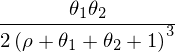

In [28]:
sympy.simplify(q[(2,1,1)])

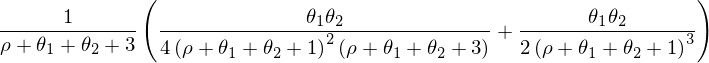

In [29]:
q[(3,1,0)]

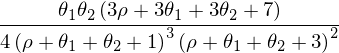

In [30]:
sympy.simplify(q[(3,1,0)])

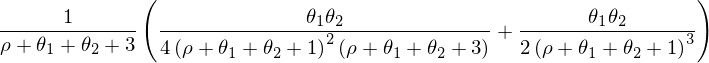

In [31]:
q[(3,0,1)]

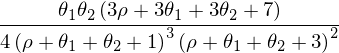

In [32]:
sympy.simplify(q[(3,0,1)])

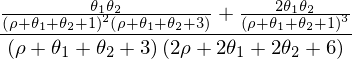

In [33]:
q[(4,0,0)]

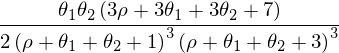

In [34]:
sympy.simplify(q[(4,0,0)])